<a href="https://colab.research.google.com/github/Pankhuri33/Netflix_ReleaseTiming_Engagement_Analysis/blob/main/NetflixRelease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Netflix Release Timing & Engagement Analysis

Author: Pankhuri Kumari

Goal: Find optimal months/days for content release based on engagement

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

Extracting and Downloading imdb dataset files

In [1]:
import pandas as pd

# Load merged dataset
df = pd.read_csv("netflix_release_cleaned.csv")

print(df.head())

             title         date_added     type         listed_in  imdb_rating  \
0  Stranger Things      July 15, 2016  TV Show     Drama, Sci-Fi          8.7   
1      Money Heist        May 2, 2017  TV Show     Action, Crime          8.2   
2        The Crown   November 4, 2016  TV Show    Drama, History          8.6   
3       Extraction     April 24, 2020    Movie  Action, Thriller          6.7   
4         Bird Box  December 21, 2018    Movie   Thriller, Drama          6.6   

   imdb_votes  
0     1123456  
1      345678  
2      234567  
3      189234  
4      367890  


Parse Dates and Create Time Columns

In [2]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month'] = df['date_added'].dt.month
df['day_of_week'] = df['date_added'].dt.day_name()

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

We will look at maximum engagement:

Best months

Best days of week

Trends by genre & season

In [3]:
# Average votes by month
month_perf = df.groupby('month')['imdb_votes'].mean().reset_index()

# Average votes by day of week
dow_perf = df.groupby('day_of_week')['imdb_votes'].mean().reset_index()

# Genre vs month performance
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0] if isinstance(x, str) else "Unknown")
genre_month = df.groupby(['genre', 'month'])['imdb_votes'].mean().reset_index()

Visualising the Findings

/tmp/ipython-input-3021850396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='imdb_votes', data=month_perf, palette='viridis')


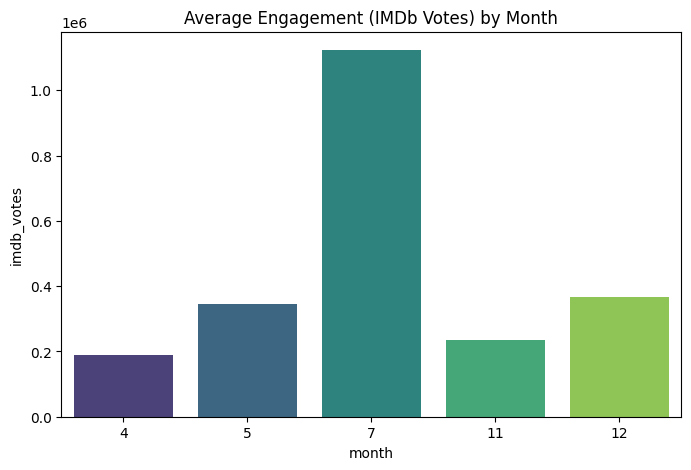

/tmp/ipython-input-3021850396.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='imdb_votes', data=dow_perf, order=dow_order, palette='plasma')


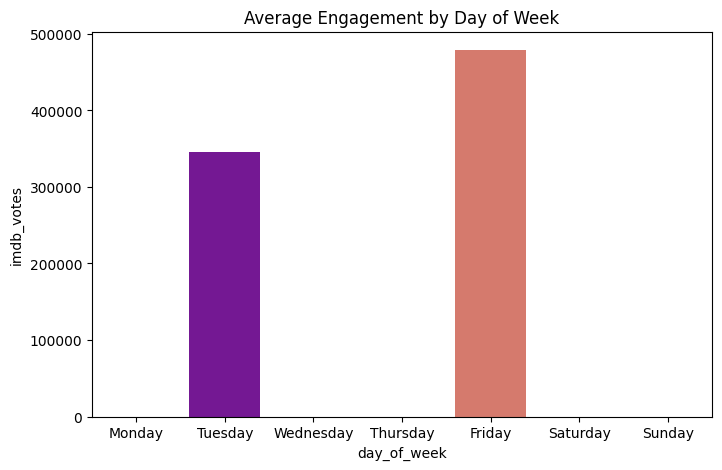

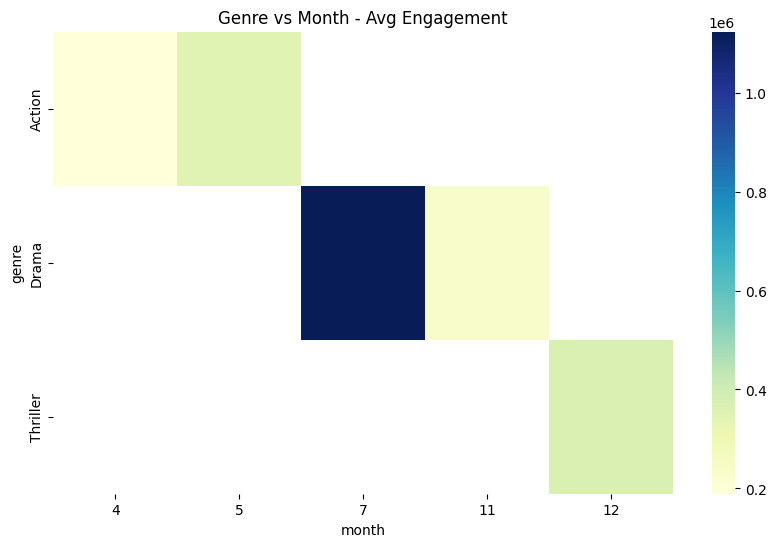

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Month performance
plt.figure(figsize=(8,5))
sns.barplot(x='month', y='imdb_votes', data=month_perf, palette='viridis')
plt.title('Average Engagement (IMDb Votes) by Month')
plt.show()

# Day of week performance
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,5))
sns.barplot(x='day_of_week', y='imdb_votes', data=dow_perf, order=dow_order, palette='plasma')
plt.title('Average Engagement by Day of Week')
plt.show()

# Genre vs Month heatmap
genre_pivot = genre_month.pivot(index='genre', columns='month', values='imdb_votes')
plt.figure(figsize=(10,6))
sns.heatmap(genre_pivot, cmap='YlGnBu')
plt.title('Genre vs Month - Avg Engagement')
plt.show()

Extract Insights
Looking for:

Which month has highest average IMDb votes?

Which day of week performs best?

Do certain genres spike in certain months/seasons?

In [5]:
print(month_perf.sort_values('imdb_votes', ascending=False).head())
print(dow_perf.sort_values('imdb_votes', ascending=False).head())

   month  imdb_votes
2      7   1123456.0
4     12    367890.0
1      5    345678.0
3     11    234567.0
0      4    189234.0
  day_of_week  imdb_votes
0      Friday   478786.75
1     Tuesday   345678.00


In [6]:
# answer to 3rd insight ques
import pandas as pd

# Load dataset
df = pd.read_csv("netflix_release_cleaned.csv")

# Convert to datetime and extract time features
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month'] = df['date_added'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Extract primary genre
df['genre'] = df['listed_in'].apply(lambda x: x.split(",")[0] if isinstance(x, str) else "Unknown")

# ---- 1️⃣ Genre spikes by month ----
genre_month = df.groupby(['genre', 'month'])['imdb_votes'].mean().reset_index()

# Find top month for each genre
genre_month_peak = genre_month.loc[genre_month.groupby('genre')['imdb_votes'].idxmax()].reset_index(drop=True)
print("🔥 Peak Month for Each Genre")
print(genre_month_peak)

# ---- 2️⃣ Genre spikes by season ----
genre_season = df.groupby(['genre', 'season'])['imdb_votes'].mean().reset_index()

# Find top season for each genre
genre_season_peak = genre_season.loc[genre_season.groupby('genre')['imdb_votes'].idxmax()].reset_index(drop=True)
print("\n🔥 Peak Season for Each Genre")
print(genre_season_peak)


🔥 Peak Month for Each Genre
      genre  month  imdb_votes
0    Action      5    345678.0
1     Drama      7   1123456.0
2  Thriller     12    367890.0

🔥 Peak Season for Each Genre
      genre  season  imdb_votes
0    Action  Spring    267456.0
1     Drama  Summer   1123456.0
2  Thriller  Winter    367890.0
